0.37155723571777344 seconds
0.3872852325439453 seconds
0.3921964168548584 seconds
0.4003114700317383 seconds
0.3901195526123047 seconds
0.3730185031890869 seconds


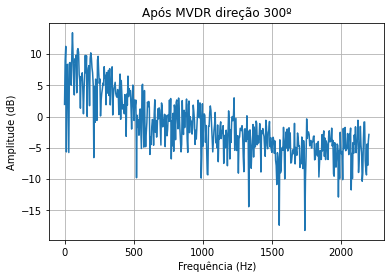

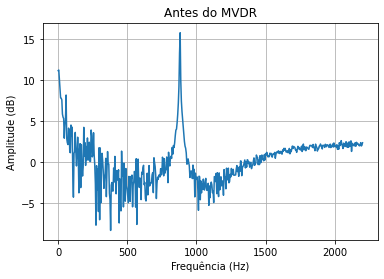

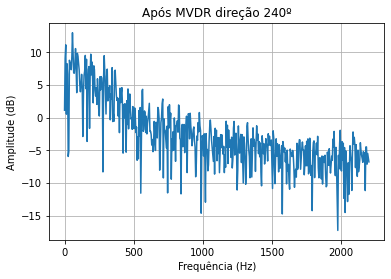

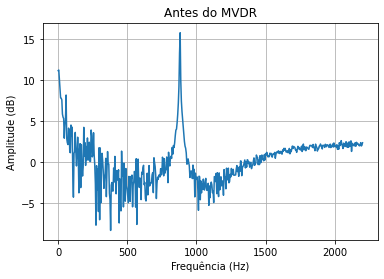

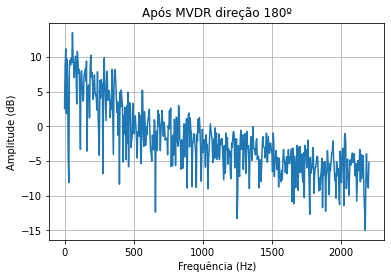

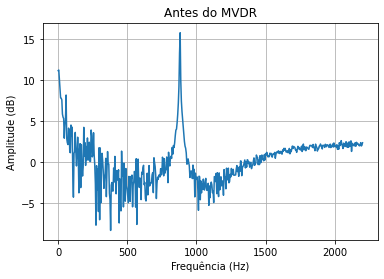

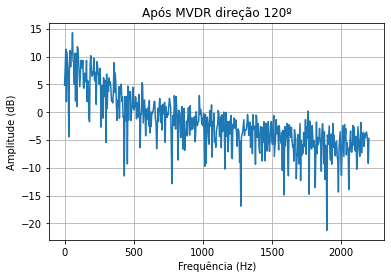

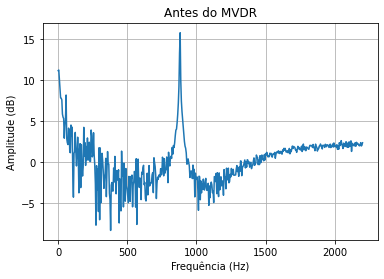

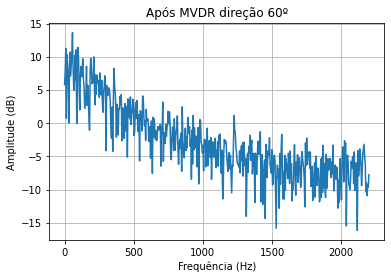

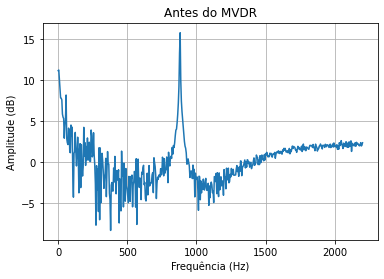

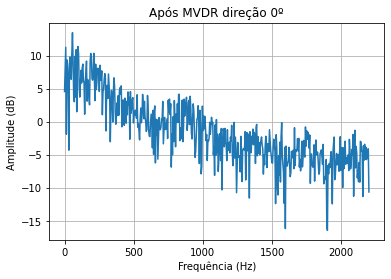

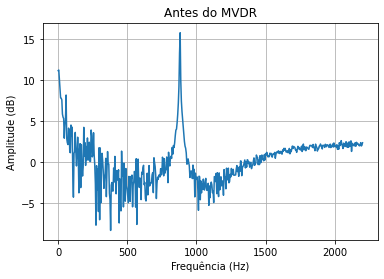

<Figure size 432x288 with 0 Axes>

In [6]:
import numpy as np
import time
import soundfile as sf
import matplotlib.pyplot as plt
import funcoes
import Classe_MVDR as mvdrbr

Fs = 44100
fft_window = 512
fft_shift = 256

Angulos_microfones = np.array([300, 240, 180, 120, 60, 0])

Diametro_rede = 0.0461*2

def aquisicao_sinais(input_path=r'./sample_data/mic{}.wav', indice_vetor=np.array([1, 2, 3, 4, 5, 6])):
        wav, _ = sf.read(input_path.replace('{}', str(indice_vetor[0])), dtype='float32')
        ondas_sonoras = np.zeros((len(wav), len(indice_vetor)), dtype=np.float32)
        ondas_sonoras[:, 0] = wav
        for i in range(1, len(indice_vetor)):
            ondas_sonoras[:, i] = sf.read(input_path.replace('{}', str(indice_vetor[i])), dtype='float32')[0]
        return ondas_sonoras

for i in Angulos_microfones:
    direcao_desejada = i
    out_path = './output/Direção_'+str(i)+' FalaHz_mvdr.wav'
    
    start_time = time.time()

    mvdr_beamformer = mvdrbr.Superdirective(Angulos_microfones, Diametro_rede, sampling_frequency=Fs, fft_window=fft_window, fft_shift=fft_shift)
    
    regula_fases = mvdr_beamformer.vetor_regula_fase(direcao_desejada)

    ondas_sonoras = aquisicao_sinais()

    Correlacao_espacial = mvdr_beamformer.Matriz_CorrelacaoEspacial(ondas_sonoras,10,10)
    bf = mvdr_beamformer.MVDR_BF(regula_fases, Correlacao_espacial)
    espectro, _ = funcoes.espectro_3D(ondas_sonoras, fft_window, fft_shift, fft_window)

    out_sound = mvdr_beamformer.aplica_beamformer(bf, espectro)
    
    print("%s seconds" %(time.time()-start_time))

    sf.write(out_path, out_sound / np.max(np.abs(out_sound)) * 0.65, Fs)

    # Plots
    Nfft = 10000
    Y1 = np.fft.fft(out_sound,Nfft)
    Y2 = np.fft.fft(ondas_sonoras[:,1],Nfft)
    w = np.arange(0,2*np.pi, 2*np.pi/Nfft)
    f = (Fs/(2*np.pi))*w
    modY1 = 10*np.log10(abs(Y1))
    angleY1 = np.angle(Y1)

    modY2 = 10*np.log10(abs(Y2))
    angleY2 = np.angle(Y2)

    plt.plot(f[0:500],modY1[0:500])
    plt.title('Após MVDR direção ' + str(i)+'º')
    plt.xlabel('Frequência (Hz)')
    plt.ylabel('Amplitude (dB)')
    plt.grid(True)
    plt.figure()

    plt.plot(f[0:500],modY2[0:500])
    plt.title('Antes do MVDR')
    plt.xlabel('Frequência (Hz)')
    plt.ylabel('Amplitude (dB)')
    plt.grid(True)
    plt.figure()

In [ ]:
import numpy as np
frequency_vector = np.linspace(0, Fs, fft_window)
Regula_fases = np.ones((len(frequency_vector), 6), dtype=np.complex64)
for f, frequency in enumerate(frequency_vector):   
   for m, mic_angle in enumerate(Angulos_microfones):
      Regula_fases[f, m] = complex(np.exp(( - 1j) * ((2 * np.pi * Fs) / 343)* (Diametro_rede / 2)* np.sin(np.deg2rad(120) - np.deg2rad(mic_angle))))
   print('Steering Vector = ' + str(Regula_fases[f,0]), Regula_fases[f,1], Regula_fases[f,2], Regula_fases[f,3], Regula_fases[f,4], Regula_fases[f,5])

In [ ]:
Y1 = np.fft.fft(ondas_sonoras[:,0],Nfft)
Y2 = np.fft.fft(ondas_sonoras[:,1],Nfft)
Y3 = np.fft.fft(ondas_sonoras[:,2],Nfft)
Y4 = np.fft.fft(ondas_sonoras[:,3],Nfft)
Y5 = np.fft.fft(ondas_sonoras[:,4],Nfft)
Y6 = np.fft.fft(ondas_sonoras[:,5],Nfft)
modY1 = 10*np.log10(abs(Y1))
modY2 = 10*np.log10(abs(Y2))
modY3 = 10*np.log10(abs(Y3))
modY4 = 10*np.log10(abs(Y4))
modY5 = 10*np.log10(abs(Y5))
modY6 = 10*np.log10(abs(Y6))
plt.plot(f[0:500],modY1[0:500])
plt.title('Antes do MVDR Y1')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude (dB)')
plt.grid(True)
plt.figure()

plt.plot(f[0:500],modY2[0:500])
plt.title('Antes do MVDR Y2')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude (dB)')
plt.grid(True)
plt.figure()

plt.plot(f[0:500],modY3[0:500])
plt.title('Antes do MVDR Y3')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude (dB)')
plt.grid(True)
plt.figure()

plt.plot(f[0:500],modY4[0:500])
plt.title('Antes do MVDR Y4')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude (dB)')
plt.grid(True)
plt.figure()

plt.plot(f[0:500],modY5[0:500])
plt.title('Antes do MVDR Y5')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude (dB)')
plt.grid(True)
plt.figure()

plt.plot(f[0:500],modY6[0:500])
plt.title('Antes do MVDR Y6')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude (dB)')
plt.grid(True)
plt.figure()